#INSTALANDO LIBS

In [1]:
 #instalando as libs necessárias
if(!require(psych)) install.packages('psych')
if(!require(DescTools)) install.packages('DescTools')
if(!require(performance)) install.packages("performance")
if(!require(corrplot)) install.packages('corrplot')

Loading required package: psych

Loading required package: DescTools


Attaching package: ‘DescTools’


The following objects are masked from ‘package:psych’:

    AUC, ICC, SD


Loading required package: performance

Loading required package: corrplot

corrplot 0.91 loaded



In [2]:
library(performance)
library(dplyr)
library(ggplot2)
library(MASS) 
library(psych)
library(DescTools)
library(corrplot)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




#LEITURA DATASET

In [3]:
#lendo dataset
df <- read.csv(file = 'high_diamond_ranked_10min.csv', stringsAsFactors = TRUE) 
df

gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,⋯,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
4519157822,0,28,2,1,9,6,11,0,0,⋯,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
4523371949,0,12,1,0,5,5,5,0,0,⋯,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
4521474530,0,15,0,0,7,11,4,1,1,⋯,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
4524384067,0,43,1,0,4,5,5,1,0,⋯,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4436033771,0,75,4,0,6,6,6,0,0,⋯,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
4475365709,1,18,0,0,5,3,6,1,1,⋯,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
4493010632,1,18,3,1,7,6,7,1,1,⋯,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
4496759358,0,16,2,0,5,13,3,0,0,⋯,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0
4443048030,0,16,3,0,7,7,8,0,0,⋯,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0


In [4]:
# renomeando as colunas (tradução)
names(df) <- c('idJogo','azulGanhou','azulSentinelasColocadas','azulSentinelasDestruidas','azulPrimeiraMorte','azulEliminacoes',
'azulMortes','azulAssistencias','azulEliteMonstros','azulDragoes','azulArautos','azulTorresDestruidas','azulOuroTotal','azulNivelMedio','azulExperienciaTotal',
'azulTotalMinionsMortos','azulTotalSelvaMinionsMortos','azulDifOuro','azulDifExperiencia','azulCSPorMin','azulOuroPorMin','vermelhoSentinelasColocadas',
'vermelhoSentinelasDestruidas','vermelhoPrimeiraMorte','vermelhoEliminacoes','vermelhoMortes','vermelhoAssistencias','vermelhoEliteMonstros','vermelhoDragoes','vermelhoArautos',
'vermelhoTorresDestruidas','vermelhoOuroTotal','vermelhoNivelMedio','vermelhoExperienciaTotal','vermelhoTotalMinionsMortos','vermelhoTotalSelvaMinionsMortos','vermelhoDifOuro',
'vermelhoDifExperiencia','vermelhoCSPorMin','vermelhoOuroPorMin')
df

idJogo,azulGanhou,azulSentinelasColocadas,azulSentinelasDestruidas,azulPrimeiraMorte,azulEliminacoes,azulMortes,azulAssistencias,azulEliteMonstros,azulDragoes,⋯,vermelhoTorresDestruidas,vermelhoOuroTotal,vermelhoNivelMedio,vermelhoExperienciaTotal,vermelhoTotalMinionsMortos,vermelhoTotalSelvaMinionsMortos,vermelhoDifOuro,vermelhoDifExperiencia,vermelhoCSPorMin,vermelhoOuroPorMin
<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
4519157822,0,28,2,1,9,6,11,0,0,⋯,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
4523371949,0,12,1,0,5,5,5,0,0,⋯,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
4521474530,0,15,0,0,7,11,4,1,1,⋯,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
4524384067,0,43,1,0,4,5,5,1,0,⋯,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4436033771,0,75,4,0,6,6,6,0,0,⋯,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
4475365709,1,18,0,0,5,3,6,1,1,⋯,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
4493010632,1,18,3,1,7,6,7,1,1,⋯,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
4496759358,0,16,2,0,5,13,3,0,0,⋯,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0
4443048030,0,16,3,0,7,7,8,0,0,⋯,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0


In [5]:
#pegando uma parte desse df (a que vai ser usada)
df2 <- data.frame( df$azulGanhou,df$azulDifOuro, df$azulDifExperiencia, df$vermelhoTotalMinionsMortos)
colnames(df2)[1] <- 'azulGanhou'
colnames(df2)[2] <- 'azulDifOuro'
colnames(df2)[3] <- 'azulDifExperiencia'
colnames(df2)[4] <- 'vermelhoTotalMinionsMortos'

df2

azulGanhou,azulDifOuro,azulDifExperiencia,vermelhoTotalMinionsMortos
<int>,<int>,<int>,<int>
0,643,-8,197
0,-2908,-1173,240
0,-1172,-1033,203
0,-1321,-7,235
0,-1004,230,225
1,698,101,221
1,2411,1563,164
0,-2615,-800,157
0,-1979,-771,240


#VERIFICANDO TIPOS DE DADOS

In [6]:
##VERIFICANDO TIPOS DE DADOS
glimpse(df)#info

glimpse(df2)

Rows: 9,879
Columns: 40
$ idJogo                          <dbl> 4519157822, 4523371949, 4521474530, 45…
$ azulGanhou                      <int> 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,…
$ azulSentinelasColocadas         <int> 28, 12, 15, 43, 75, 18, 18, 16, 16, 13…
$ azulSentinelasDestruidas        <int> 2, 1, 0, 1, 4, 0, 3, 2, 3, 1, 3, 2, 1,…
$ azulPrimeiraMorte               <int> 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,…
$ azulEliminacoes                 <int> 9, 5, 7, 4, 6, 5, 7, 5, 7, 4, 4, 11, 7…
$ azulMortes                      <int> 6, 5, 11, 5, 6, 3, 6, 13, 7, 5, 4, 11,…
$ azulAssistencias                <int> 11, 5, 4, 5, 6, 6, 7, 3, 8, 5, 6, 7, 1…
$ azulEliteMonstros               <int> 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,…
$ azulDragoes                     <int> 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,…
$ azulArautos                     <int> 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,…
$ azulTorresDestruidas            <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ azulOuroTotal 

#ANÁLISE DESCRITIVA DAS VARIÁVEIS

In [7]:
# ANÁLISE DESCRITIVA DAS VARIÁVEIS
summary(df)

summary(df2)

     idJogo            azulGanhou    azulSentinelasColocadas
 Min.   :4.295e+09   Min.   :0.000   Min.   :  5.00         
 1st Qu.:4.483e+09   1st Qu.:0.000   1st Qu.: 14.00         
 Median :4.511e+09   Median :0.000   Median : 16.00         
 Mean   :4.500e+09   Mean   :0.499   Mean   : 22.29         
 3rd Qu.:4.522e+09   3rd Qu.:1.000   3rd Qu.: 20.00         
 Max.   :4.528e+09   Max.   :1.000   Max.   :250.00         
 azulSentinelasDestruidas azulPrimeiraMorte azulEliminacoes    azulMortes    
 Min.   : 0.000           Min.   :0.0000    Min.   : 0.000   Min.   : 0.000  
 1st Qu.: 1.000           1st Qu.:0.0000    1st Qu.: 4.000   1st Qu.: 4.000  
 Median : 3.000           Median :1.0000    Median : 6.000   Median : 6.000  
 Mean   : 2.825           Mean   :0.5048    Mean   : 6.184   Mean   : 6.138  
 3rd Qu.: 4.000           3rd Qu.:1.0000    3rd Qu.: 8.000   3rd Qu.: 8.000  
 Max.   :27.000           Max.   :1.0000    Max.   :22.000   Max.   :22.000  
 azulAssistencias azulElite

   azulGanhou     azulDifOuro        azulDifExperiencia
 Min.   :0.000   Min.   :-10830.00   Min.   :-9333.00  
 1st Qu.:0.000   1st Qu.: -1585.50   1st Qu.:-1290.50  
 Median :0.000   Median :    14.00   Median :  -28.00  
 Mean   :0.499   Mean   :    14.41   Mean   :  -33.62  
 3rd Qu.:1.000   3rd Qu.:  1596.00   3rd Qu.: 1212.00  
 Max.   :1.000   Max.   : 11467.00   Max.   : 8348.00  
 vermelhoTotalMinionsMortos
 Min.   :107.0             
 1st Qu.:203.0             
 Median :218.0             
 Mean   :217.3             
 3rd Qu.:233.0             
 Max.   :289.0             

In [8]:
# verificando categoria de referência
levels(df$azulGanhou)#0,1
df$azulGanhou <- ifelse(test=df$azulGanhou == 0, yes="Derrota", no="Vitoria")
df$azulGanhou <- as.factor(df$azulGanhou)
levels(df$azulGanhou)#Derrota,Vitoria

NULL

[1] "Derrota" "Vitoria"

#MODELO

In [9]:
#modelo que usa todas variaveis pra prever derrota ou vitoria
modelo_full <- glm(azulGanhou ~ ., family=binomial(link='logit'), data=df)
summary(modelo_full)


Call:
glm(formula = azulGanhou ~ ., family = binomial(link = "logit"), 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7117  -0.8724  -0.1411   0.8674   2.7623  

Coefficients: (13 not defined because of singularities)
                                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     -4.083e+00  4.131e+00  -0.988 0.322937    
idJogo                           8.196e-10  8.730e-10   0.939 0.347812    
azulSentinelasColocadas         -2.056e-03  1.340e-03  -1.534 0.125037    
azulSentinelasDestruidas         8.858e-04  1.145e-02   0.077 0.938340    
azulPrimeiraMorte                6.997e-02  5.250e-02   1.333 0.182604    
azulEliminacoes                 -3.141e-02  3.058e-02  -1.027 0.304364    
azulMortes                       2.797e-02  3.064e-02   0.913 0.361325    
azulAssistencias                -1.505e-02  1.163e-02  -1.294 0.195673    
azulEliteMonstros                3.972e-02  6.509e-02   0.610 0.54

In [10]:
#Retiramos atributos que não eram estatisticamente significativos por meio do método de backward (com base no pvalue) do modelo full pra basear a estrutura do modelo 1 
#Modelo ajustado 1
mod1 <- glm(azulGanhou ~ azulDifOuro+azulDifExperiencia+vermelhoTotalMinionsMortos, family=binomial(link="logit"), data=df)
summary(mod1)


Call:
glm(formula = azulGanhou ~ azulDifOuro + azulDifExperiencia + 
    vermelhoTotalMinionsMortos, family = binomial(link = "logit"), 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8564  -0.8939  -0.1393   0.8892   2.7105  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -7.506e-01  2.681e-01  -2.799  0.00512 ** 
azulDifOuro                 4.326e-04  2.314e-05  18.695  < 2e-16 ***
azulDifExperiencia          2.476e-04  2.835e-05   8.733  < 2e-16 ***
vermelhoTotalMinionsMortos  3.434e-03  1.225e-03   2.804  0.00505 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 13695  on 9878  degrees of freedom
Residual deviance: 10572  on 9875  degrees of freedom
AIC: 10580

Number of Fisher Scoring iterations: 4


#PRESSUPOSTOS

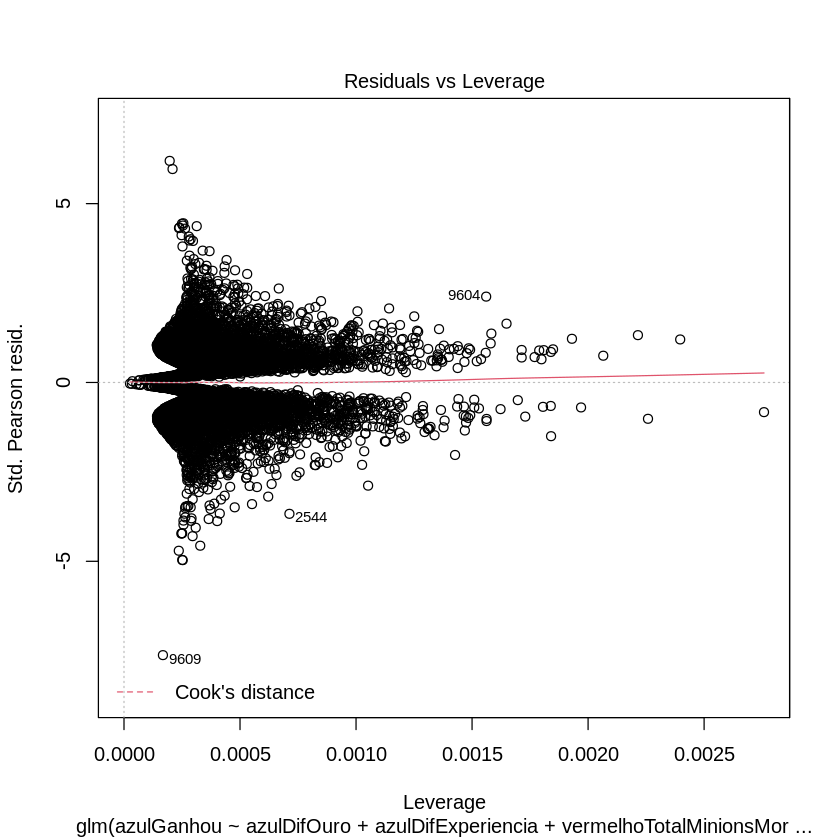

In [11]:
#PRESSUPOSTO 1 E 2 OK

#verificando pressuposto dos outliers
plot(mod1, which = 5)

In [12]:
summary(stdres(mod1))

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-7.646788 -0.702889 -0.099027 -0.000144  0.698437  6.214789 

,Term,VIF,SE_factor
,<chr>,<dbl>,<dbl>
1,azulDifOuro,1.018482,1.009199
2,azulDifExperiencia,1.006413,1.003201
3,vermelhoTotalMinionsMortos,1.024895,1.012371


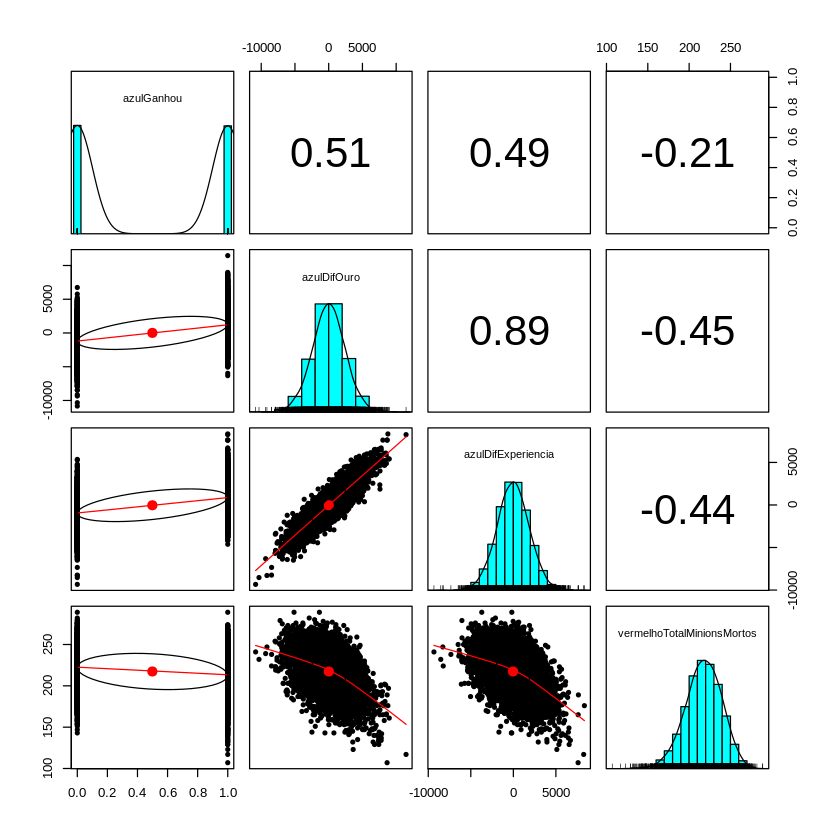

In [13]:
#verificando pressuposto da multicolineariedade (r > 0.9 ou 0.8 sla)
pairs.panels(df2)
check_collinearity(mod1)

In [15]:
#o check collinearity até deu bom, mas o panels apitou entre golddif e expdif. Modelo 2 se livra de exp dif
mod2 <- glm(azulGanhou ~ azulDifOuro+vermelhoTotalMinionsMortos, family=binomial, data=df)
summary(mod2)

#optamos por continuar pelo modelo 1, que tinha um summary melhor


Call:
glm(formula = azulGanhou ~ azulDifOuro + vermelhoTotalMinionsMortos, 
    family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7931  -0.9041  -0.1367   0.8976   2.7471  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -0.5747883  0.2660687  -2.160   0.0307 *  
azulDifOuro                 0.0005971  0.0000142  42.062   <2e-16 ***
vermelhoTotalMinionsMortos  0.0025795  0.0012150   2.123   0.0338 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 13695  on 9878  degrees of freedom
Residual deviance: 10649  on 9876  degrees of freedom
AIC: 10655

Number of Fisher Scoring iterations: 4


#ANÁLISE DESCRITIVA

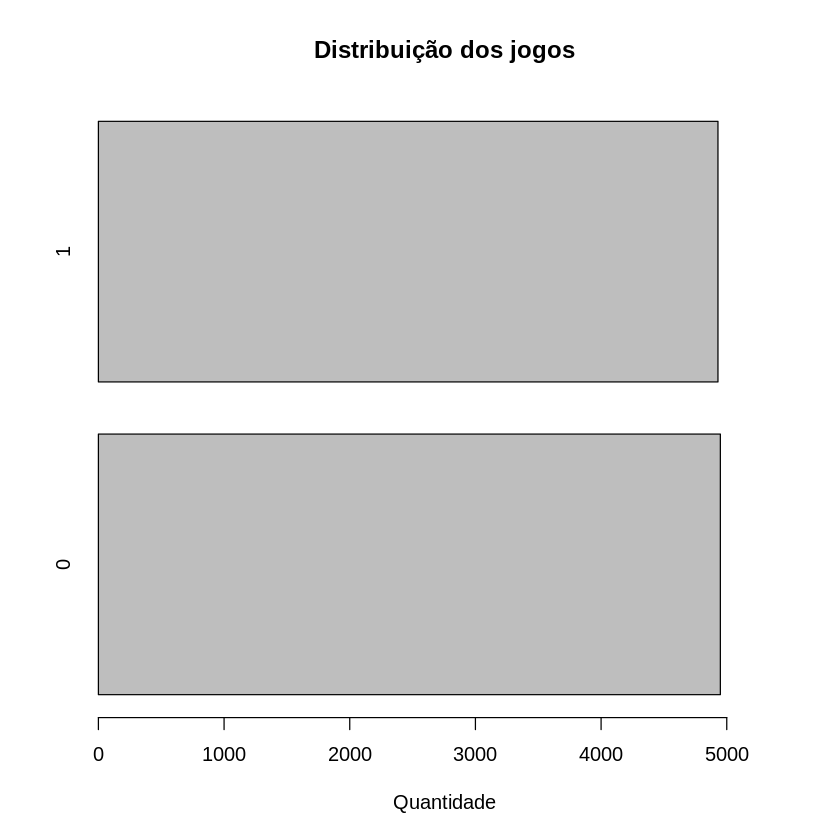

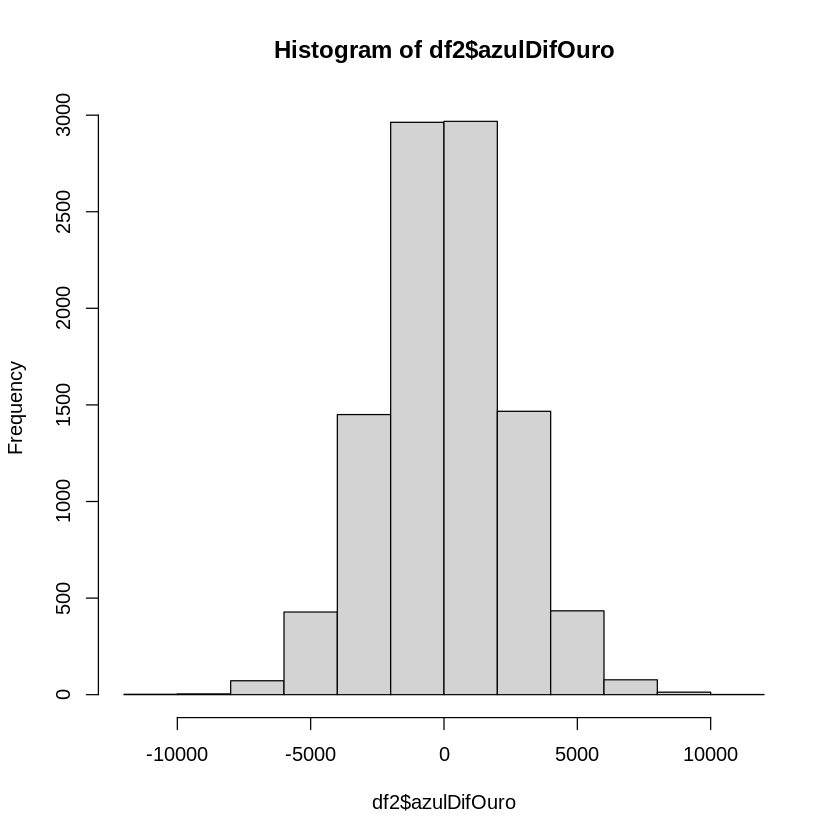

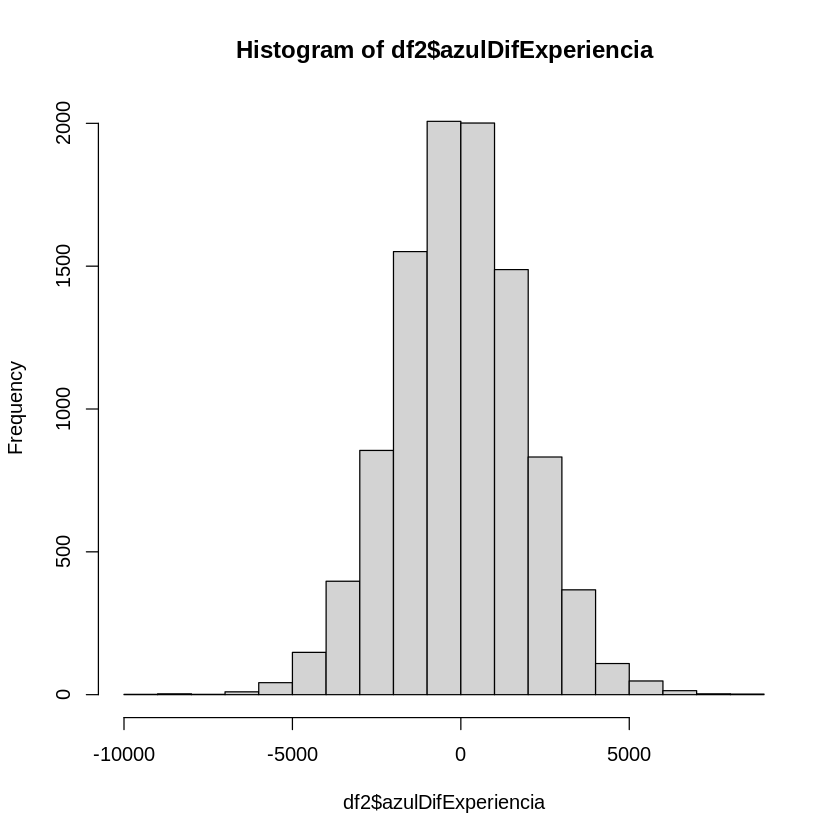

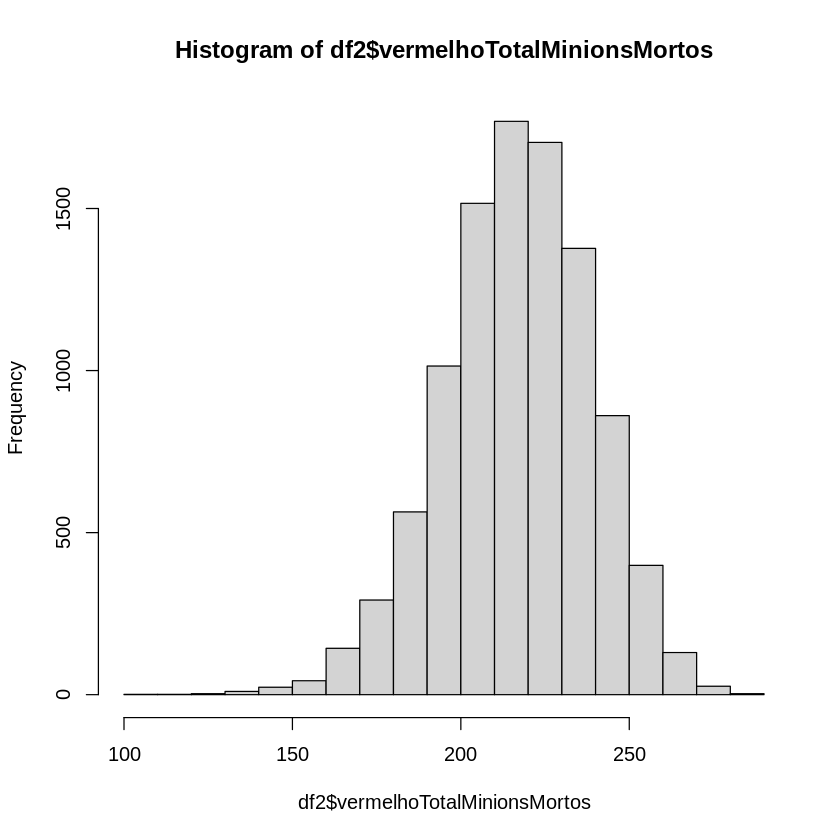

In [16]:
#análise descritiva das variáveis escolhidas:
counts <- table(df2$azulGanhou) 
barplot(counts, main="Distribuição dos jogos", horiz=TRUE, xlim = c(0,5500), xlab="Quantidade")
hist(df2$azulDifOuro)
hist(df2$azulDifExperiencia)
hist(df2$vermelhoTotalMinionsMortos)

In [17]:
#PRESSUPOSTO Relação linear entre cada variavel independente continua e logito

df2$logazulDifOuro <- df2$azulDifOuro * log(abs(df2$azulDifOuro))
df2$logazulDifExperiencia <-df2$azulDifExperiencia * log(abs(df2$azulDifExperiencia))
df2$logvermelhoTotalMinionsMortos <-df2$vermelhoTotalMinionsMortos * log(abs(df2$vermelhoTotalMinionsMortos))

In [18]:
#mod1 + os logs
mod1_log <- glm(azulGanhou ~ azulDifOuro+azulDifExperiencia+vermelhoTotalMinionsMortos+logazulDifOuro+logazulDifExperiencia+logvermelhoTotalMinionsMortos, family=binomial(link="logit"), data=df2)
summary(mod1_log)

# os p-values dos logs são bem acima de 0,05 o que demonstra que não há uma relação estatistica significativa.
#então podemos dizer que pelo teste de Box-tidwell  podemos afirmar este pressuposto


Call:
glm(formula = azulGanhou ~ azulDifOuro + azulDifExperiencia + 
    vermelhoTotalMinionsMortos + logazulDifOuro + logazulDifExperiencia + 
    logvermelhoTotalMinionsMortos, family = binomial(link = "logit"), 
    data = df2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8665  -0.8913  -0.1429   0.8892   2.7037  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)  
(Intercept)                    2.162e+00  3.589e+00   0.602   0.5469  
azulDifOuro                    4.504e-04  2.360e-04   1.909   0.0563 .
azulDifExperiencia             2.846e-04  2.859e-04   0.996   0.3194  
vermelhoTotalMinionsMortos    -8.342e-02  1.064e-01  -0.784   0.4332  
logazulDifOuro                -2.227e-06  2.988e-05  -0.075   0.9406  
logazulDifExperiencia         -4.884e-06  3.726e-05  -0.131   0.8957  
logvermelhoTotalMinionsMortos  1.364e-02  1.670e-02   0.816   0.4143  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Di

In [19]:
#outra forma de verificar relação linear (gráficos)

logito <- mod1$linear.predictors
df2$logito <- logito 
df2

azulGanhou,azulDifOuro,azulDifExperiencia,vermelhoTotalMinionsMortos,logazulDifOuro,logazulDifExperiencia,logvermelhoTotalMinionsMortos,logito
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
0,643,-8,197,4157.731,-16.63553,1040.7911,0.2021059
0,-2908,-1173,240,-23191.942,-8289.96618,1315.3533,-1.4746411
0,-1172,-1033,203,-8281.899,-7169.24981,1078.5808,-0.8161352
0,-1321,-7,235,-9492.897,-13.62137,1283.0026,-0.5166806
0,-1004,230,225,-6939.394,1250.75824,1218.6226,-0.3552294
1,698,101,221,4570.657,466.12717,1192.9940,0.3353046
1,2411,1563,164,18776.378,11494.86832,836.3781,1.2424649
0,-2615,-800,157,-20577.486,-5347.68938,793.8306,-1.5406046
0,-1979,-771,240,-15021.297,-5125.36774,1315.3533,-0.9732743


`geom_smooth()` using formula 'y ~ x'



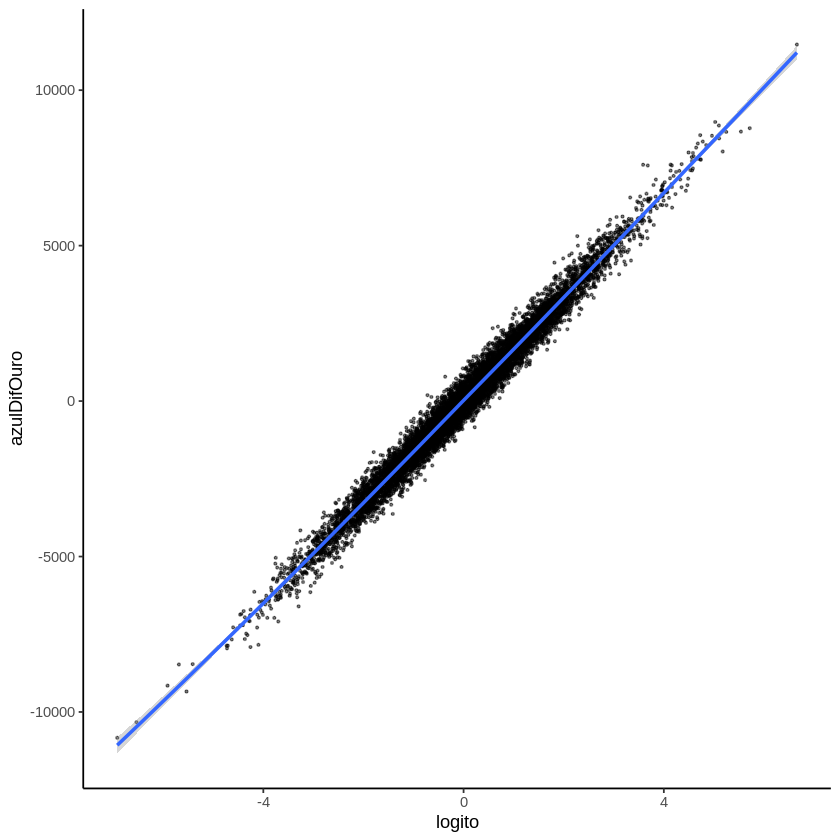

In [20]:
#linearidade comprovada por meio dos gráficos abaixo
ggplot(df2, aes(logito, azulDifOuro)) + geom_point(size = 0.5, alpha = 0.5) + geom_smooth(method = "loess") + theme_classic()

`geom_smooth()` using formula 'y ~ x'



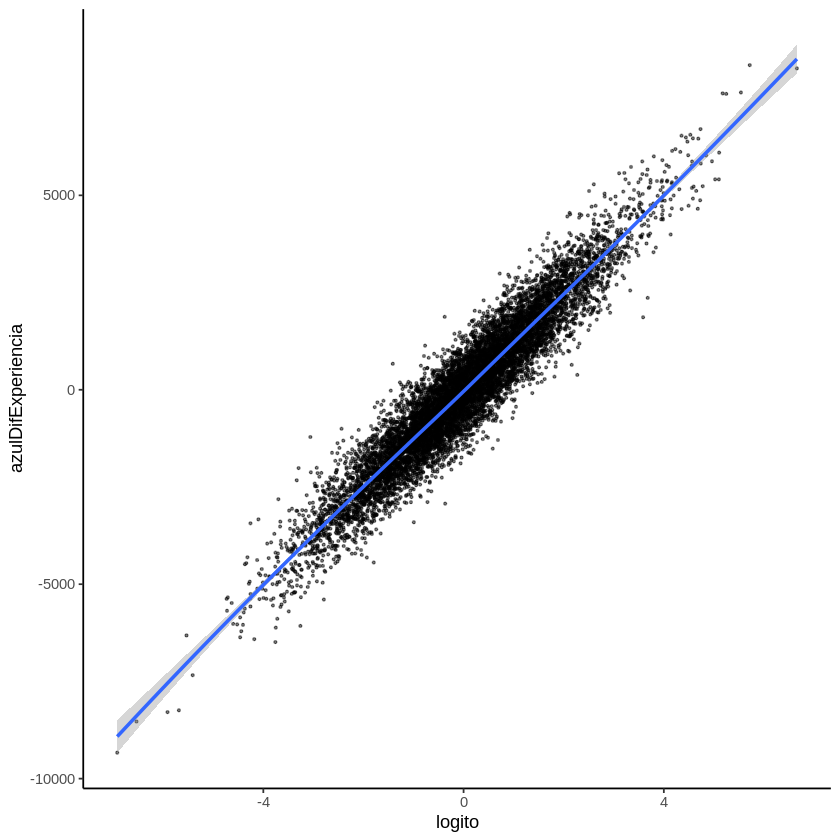

In [21]:
ggplot(df2, aes(logito, azulDifExperiencia)) + geom_point(size = 0.5, alpha = 0.5) + geom_smooth(method = "loess") + theme_classic()

`geom_smooth()` using formula 'y ~ x'



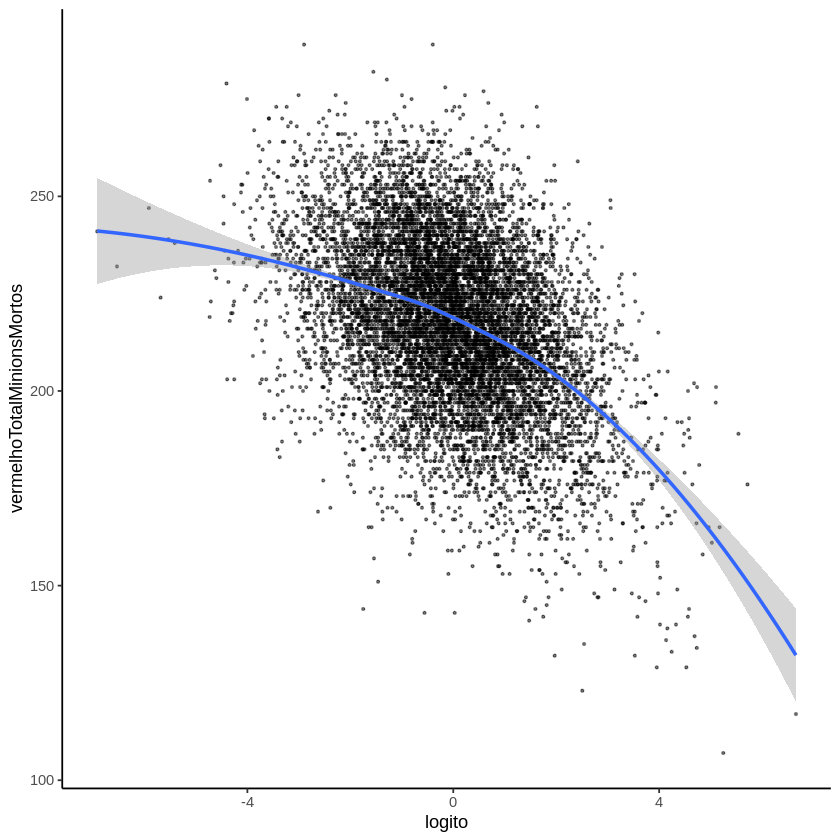

In [22]:
ggplot(df2, aes(logito, vermelhoTotalMinionsMortos)) + geom_point(size = 0.5, alpha = 0.5) + geom_smooth(method = "loess") + theme_classic()

linearidade comprovada por meio dos gráficos acima

#RESULTADOS

Odds Ratio e IC (com log-likelihood)

In [23]:
#cálculo dos OR com intervalo de confiança de 95%
exp(cbind(OR = coef(mod1), confint(mod1)))

Waiting for profiling to be done...



,OR,2.5 %,97.5 %
(Intercept),0.4720827,0.278990,0.7982191
azulDifOuro,1.0004326,1.000387,1.0004782
azulDifExperiencia,1.0002476,1.000192,1.0003033
vermelhoTotalMinionsMortos,1.0034402,1.001036,1.0058539


Log likelihood

In [24]:
#cálculo do Log Likelihood
logLik(mod2)

'log Lik.' -5324.453 (df=3)

pseudo R2

In [25]:
#cálculo do pseudo R2 (escolhemos o Nagelkerke para apresentação)
df2$azulGanhou.factor <- factor(df2$azulGanhou)
PseudoR2(mod1, which = "Nagelkerke")
PseudoR2(mod1, which = "CoxSnell")
PseudoR2(mod1, which = "McFadden")

Nagelkerke 
  0.361425

CoxSnell 
0.2710684

McFadden 
0.2280729